In [168]:
#Блок импорта
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy  as np

In [169]:
# Первичная подгрузка и просмотр данных
churn_data = pd.read_csv('churn.csv')
main_df = churn_data
display(main_df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Процент ушедших  клиентов: 20.37
Процент оставшихся  клиентов: 79.63


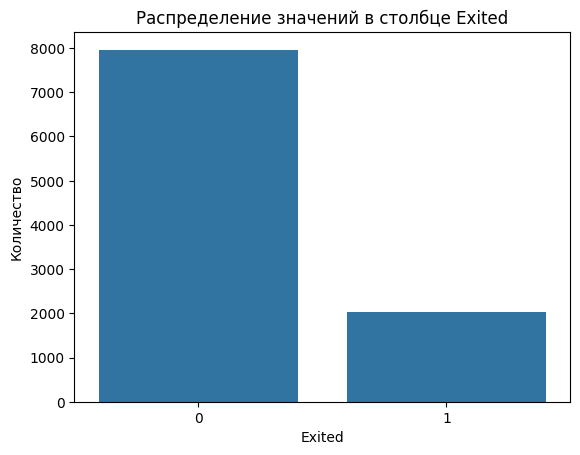

'Процент оставшихся клиентов сильно больше, чем ушедших'

In [170]:
## ЗАДАНИЕ 1
# Функция получения процента ушедших  от общего
def get_exited_percent(df):
    count_exited = df[ df["Exited"] == 1 ].shape[0]
    count_all = df.shape[0]
    return round(count_exited / count_all * 100, 2)


exited_uniqs = main_df["Exited"].unique()
#print(f"Варианты значений в столбце Exited: {exited_uniqs}")    # Вариации значений: 1 и 0


percent_of_exited = get_exited_percent(main_df)                 # Можно найти второй параметр вычев из ста так как в столбце только эти значения.
percent_of_stayed = 100 - percent_of_exited

print(f"Процент ушедших  клиентов: {percent_of_exited}")
print(f"Процент оставшихся  клиентов: {percent_of_stayed}")

# Покажем соотношение на графике
# Создание countplot
sns.countplot(x='Exited', data=main_df)

# Добавление заголовка и меток
plt.title('Распределение значений в столбце Exited')
plt.xlabel('Exited')
plt.ylabel('Количество')

# Отображение графика
plt.show()

"""Процент оставшихся клиентов сильно больше, чем ушедших"""

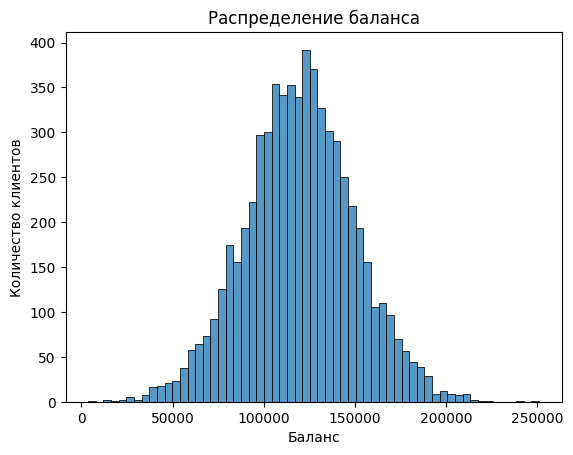

'Распределение походит на нормальное'

In [171]:
## ЗАДАНИЕ 2
# Фильтрация записей по количеству на счету
money_filtered_df = main_df[ main_df["Balance"] > 2500 ]

# Покажем распределение на графике распределения
sns.histplot(money_filtered_df['Balance'])

# Добавление названий осей и заголовка
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Распределение баланса')

# Показать график
plt.show()



# Блок проверки данных
#display(money_filtered_df.head())

"""Распределение походит на нормальное"""

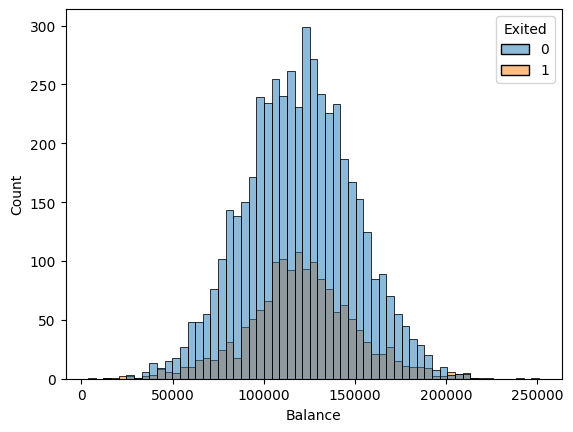

'Оставшиеся клиенты в '

In [172]:
### ЗДАНИЕ 3
# Покажем на графике распределение баланса в разрезе ушедших клиентов

sns.histplot(data=money_filtered_df, x='Balance', hue='Exited')
plt.show()

"""Оставшиеся клиенты в """

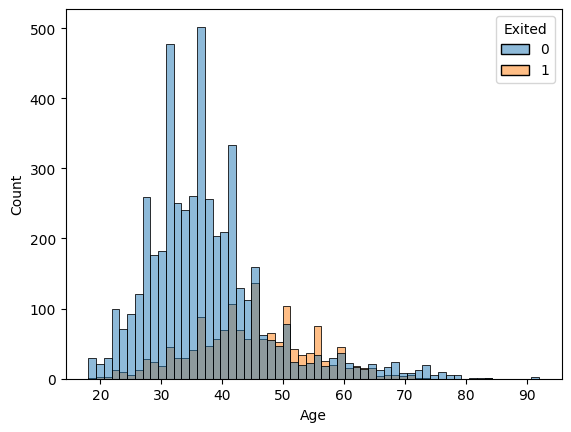

'Соотношение ушедших и оставшихся клиентов начинает сравниваться от 43 лет и далее. На эту возрастную группу следует обратить особое внимание для выяснения причин увеличения процента ухода'

In [173]:
### ЗАДАНИЕ 4

sns.histplot(data=money_filtered_df, x='Age', hue='Exited')
plt.show()

"""Соотношение ушедших и оставшихся клиентов начинает сравниваться от 43 лет и далее. На эту возрастную группу следует обратить особое внимание для выяснения причин увеличения процента ухода"""

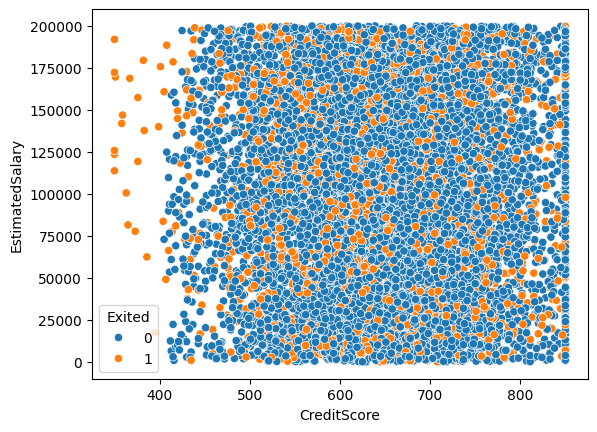

'Никаких потенциально интересных взаимосвязей обнаружить не удалось'

In [174]:
### ЗАДАНИЕ 5
sns.scatterplot(data=main_df, x='CreditScore', y='EstimatedSalary', hue='Exited')
plt.show()

"""Никаких потенциально интересных взаимосвязей обнаружить не удалось"""

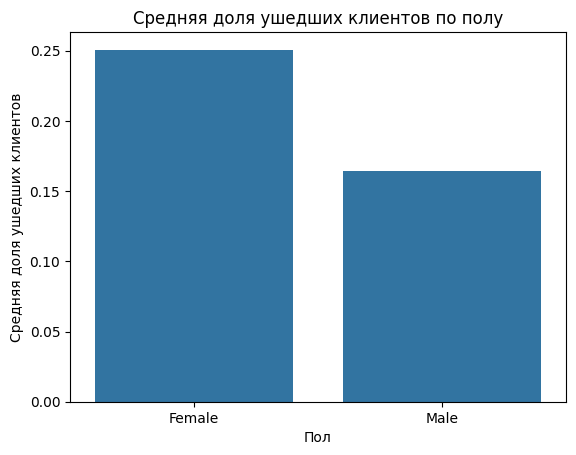

'У женщин показатель ушедших заметно выше'

In [175]:
### ЗАДАНИЕ 6
# Подготовим данные
percents_of_leave_df = main_df.groupby('Gender')["Exited"].mean().reset_index()

# Покажем зависимости на графике
sns.barplot(x='Gender', y='Exited', data=percents_of_leave_df)

# Настраиваем отображение графика
plt.title('Средняя доля ушедших клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Средняя доля ушедших клиентов')
plt.show()

"""У женщин показатель ушедших заметно выше"""

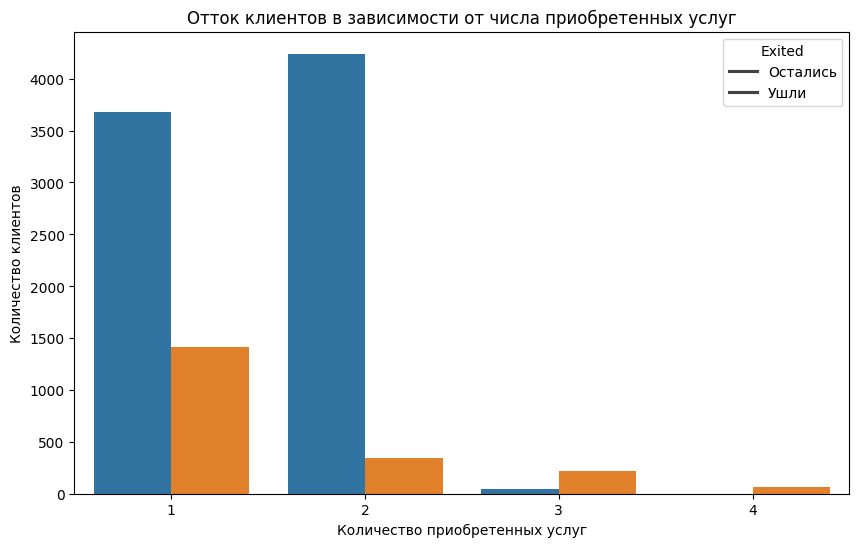

'Соотношение ушедших клиентов начинает сильно перевешивать на 3ей покупке услуги. При движение от первой услуге ко второй снижается средний шанс ухода. По достижению "четвертой услуги" большинство клиентов ушли'

In [176]:
### ЗАДАНИЕ 7
# Группировка данных
grouped_data = main_df.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Count', hue='Exited', data=grouped_data)

plt.title('Отток клиентов в зависимости от числа приобретенных услуг')
plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Количество клиентов')
plt.legend(title='Exited', labels=['Остались', 'Ушли'])
plt.show()

"""Соотношение ушедших клиентов начинает сильно перевешивать на 3ей покупке услуги. При движение от первой услуге ко второй снижается средний шанс ухода. По достижению "четвертой услуги" большинство клиентов ушли"""

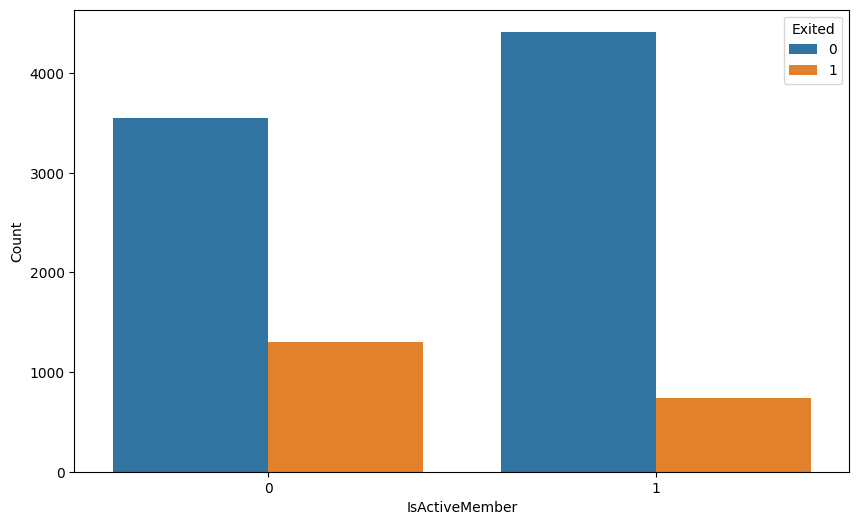

'У активных пользователь соотношение ушедших/оставшихся выглядит "лучше" '

In [177]:
### Задание 8
# Группировка данных
grouped_data = main_df.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='IsActiveMember', y='Count', hue='Exited', data=grouped_data)

"""plt.title('Отток клиентов в зависимости от Активности')
plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Количество клиентов')
plt.legend(title='Exited', labels=['Остались', 'Ушли'])"""
plt.show()

"""У активных пользователь соотношение ушедших/оставшихся выглядит "лучше" """

array(['France', 'Spain', 'Germany'], dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_26204\2479319977.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


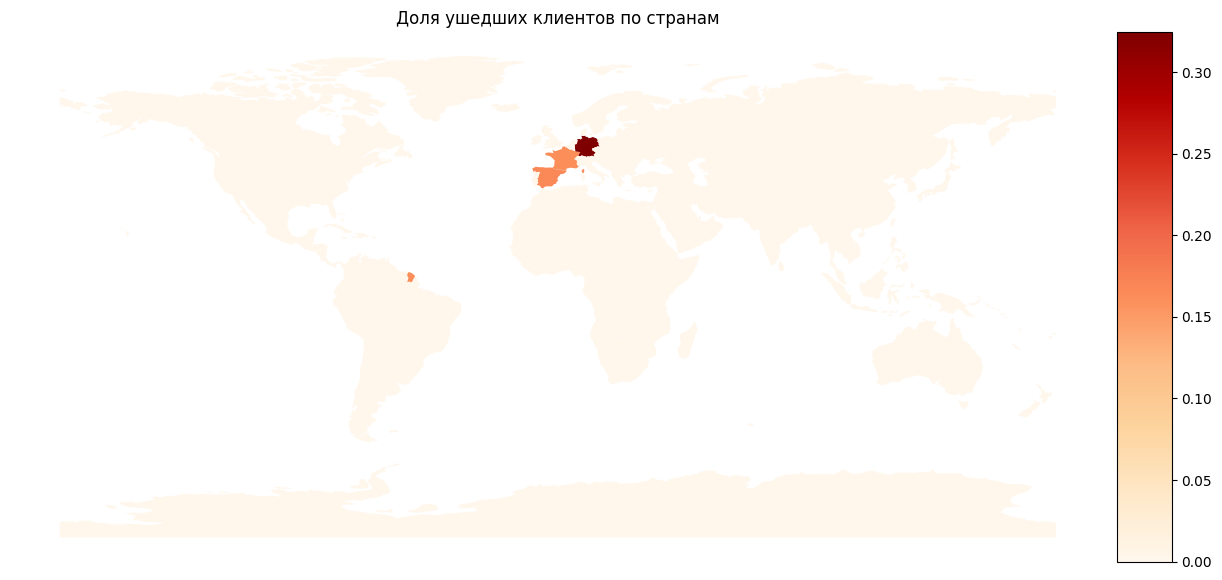

In [178]:
### Задание 9
display(main_df["Geography"].unique())

# Расчет доли ушедших клиентов по странам
country_exit_rates = main_df.groupby('Geography')['Exited'].mean().reset_index()

# Загрузка карты мира
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Объединение данных с картой
world_exit = world.merge(country_exit_rates, left_on='name', right_on='Geography', how='left')
world_exit['Exited'] = world_exit['Exited'].fillna(0) # Заполнение пустых значений нулями

# Построение тепловой картограммы
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world_exit.plot(column='Exited', ax=ax, legend=True, cax=cax, cmap='OrRd', 
                missing_kwds={'color': 'lightgrey'})

ax.set_title('Доля ушедших клиентов по странам')
ax.set_axis_off()
plt.show()

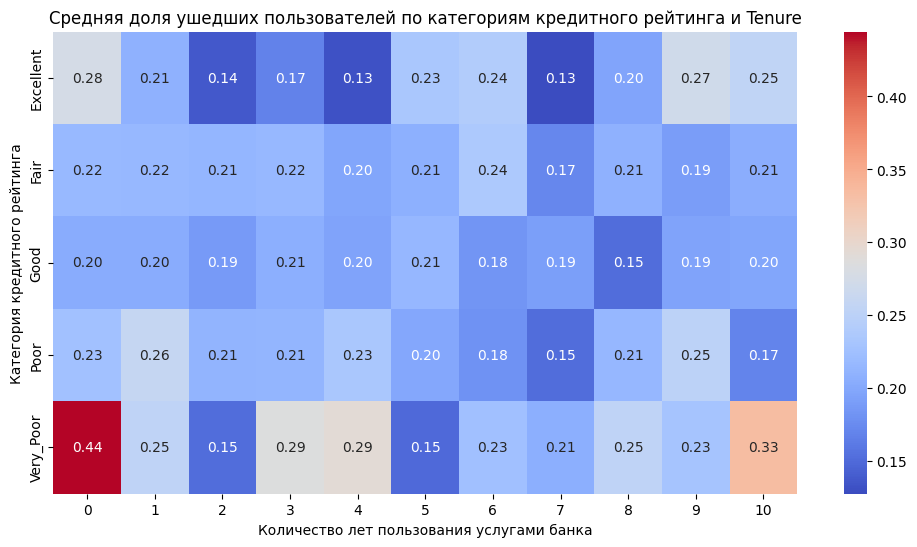

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


'Самый большой процент ухода у категории "Very_Poor" по первому и десятому годам. '

In [179]:
# Задание 10
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


main_df["CreditScoreCat"] = main_df["CreditScore"].apply(get_credit_score_cat)

pivot_table = main_df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Средняя доля ушедших пользователей по категориям кредитного рейтинга и Tenure')
plt.xlabel('Количество лет пользования услугами банка')
plt.ylabel('Категория кредитного рейтинга')
plt.show()


display(pivot_table)

"""Самый большой процент ухода у категории "Very_Poor" по первому и десятому годам. """